In [1]:
import warnings
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll, make_blobs, load_digits
from sklearn import decomposition
from sklearn.manifold import TSNE as ts

In [2]:

data = pd.read_csv('dig.txt',header=None,delimiter=',')
data=np.array(data)

In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
l = scaler.fit_transform(data)

(784,)
(784,)


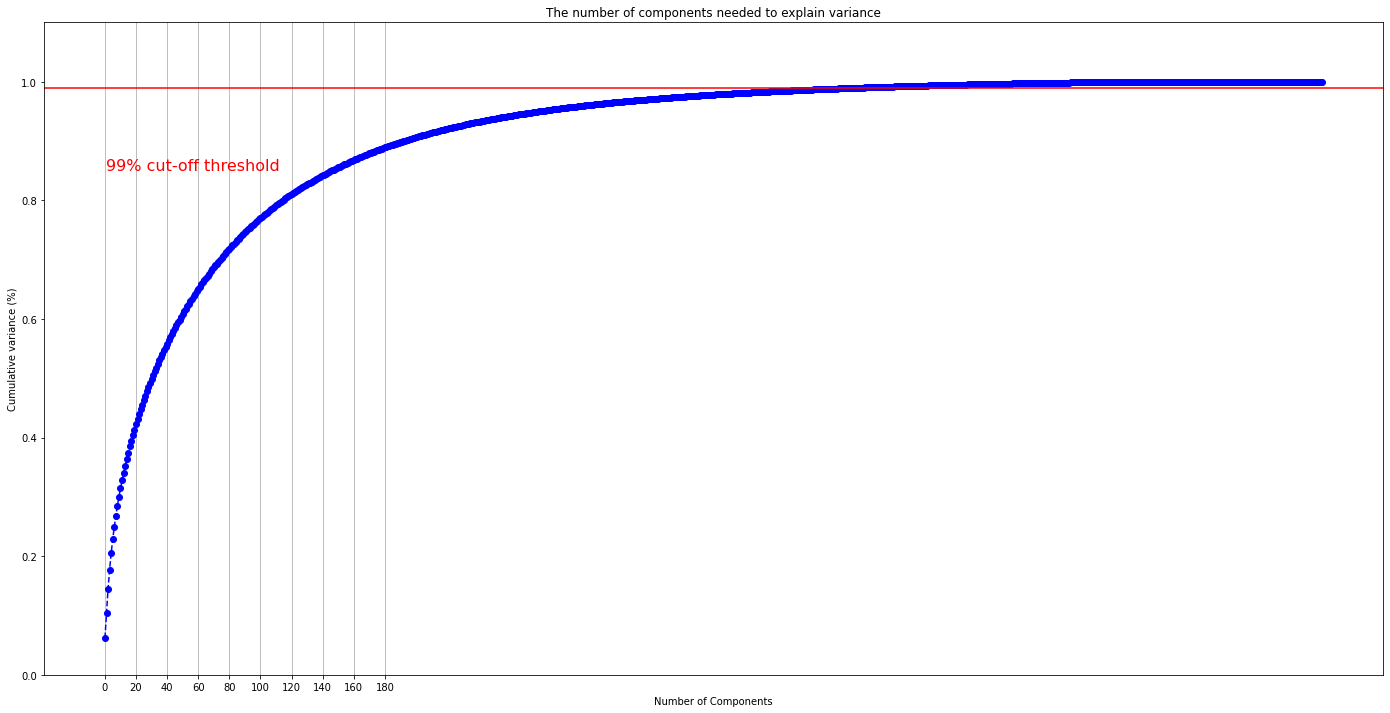

In [4]:
from sklearn.decomposition import PCA

pca = PCA().fit(l)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,12)

fig, ax = plt.subplots()
xi = np.arange(0, 784, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(xi.shape)
print(y.shape)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=20)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [5]:
pca = PCA(n_components = 0.99)
pca.fit(data)
data = pca.transform(data)

In [6]:
type(data)

numpy.ndarray

In [7]:
q=ts(n_components=2, perplexity=30.0, 
		early_exaggeration=12.0, learning_rate=200.0, 
		n_iter=1000, n_iter_without_progress=300, 
		min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
		random_state=None, method='barnes_hut', angle=0.5, n_jobs=None)

In [8]:
data=q.fit_transform(data)

In [9]:

def form_clusters(data,k):
  tot_rows=data.shape[0]
  tot_cols=data.shape[1]
  centroids = data[np.random.choice(data.shape[0], size=k, replace=False), :]
  
  cluster_assign = np.empty(tot_rows)
  cluster_distance = np.empty(tot_rows)

  # boolean value to check whether previous centroid is the same as the new one
  same_centroids = False
  max_iter = 2500
  while max_iter > 0 and not(same_centroids):
    #assign clusters to data instances
    for row in range(0, tot_rows):
      curr_iter = data[row]
      # calculate eucledian distance between the current instance and all the centroids
      # assign the current instance to the nearest cluster
      min_distance = float("inf")
      for centroid_index in range(0, k):
        distance = np.linalg.norm(curr_iter - centroids[centroid_index])
        if distance < min_distance:          
          min_distance=distance
          cluster_distance[row]=min_distance
          cluster_assign[row]=centroid_index

    # Store the old centroids
    old_centroids = centroids.copy()
    # Calculate new centroids as per new cluster assignments
    for r_centroid in range(0, k):
      for c_centroid in range(0, tot_cols):
         curr_sum = 0
         count = 0
         avg = None
         for row in range(0, tot_rows):
              # If this instance belongs to this cluster
              if(r_centroid == cluster_assign[row]):   
                 # Add this value to the running sum
                 curr_sum += data[row,c_centroid]
                 # Increment the counter
                 count=count+1
         if (count > 0):
           avg = curr_sum / count
          # Update the centroids array with this avg
         centroids[r_centroid,c_centroid] = avg
    same_centroids = np.array_equal(old_centroids,centroids)
    max_iter=max_iter-1

  output = np.empty(tot_rows,dtype=int)
  for i in range(0,tot_rows):
    output[i]=int(cluster_assign[i]+1)
  return output
  
  

In [10]:
output=form_clusters(data,10)
pd.DataFrame(output).to_csv('dig_sub.txt',index=False,header=None)